In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

In [69]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [70]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
df1 = df.drop('Id',axis=1)
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
un = pd.DataFrame(df1.nunique())
un

,0
MSSubClass,15
MSZoning,5
LotFrontage,110
LotArea,1073
Street,2
...,...
MoSold,12
YrSold,5
SaleType,9
SaleCondition,6


viewing in variable explorer

In [73]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [74]:
df1.shape

(1460, 80)

In [75]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 43 categorical variables

The categorical variables : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [76]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 37 numerical variables

The numerical variables : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


array([[<AxesSubplot: title={'center': 'MSSubClass'}>,
        <AxesSubplot: title={'center': 'LotFrontage'}>,
        <AxesSubplot: title={'center': 'LotArea'}>,
        <AxesSubplot: title={'center': 'OverallQual'}>,
        <AxesSubplot: title={'center': 'OverallCond'}>,
        <AxesSubplot: title={'center': 'YearBuilt'}>],
       [<AxesSubplot: title={'center': 'YearRemodAdd'}>,
        <AxesSubplot: title={'center': 'MasVnrArea'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF1'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF2'}>,
        <AxesSubplot: title={'center': 'BsmtUnfSF'}>,
        <AxesSubplot: title={'center': 'TotalBsmtSF'}>],
       [<AxesSubplot: title={'center': '1stFlrSF'}>,
        <AxesSubplot: title={'center': '2ndFlrSF'}>,
        <AxesSubplot: title={'center': 'LowQualFinSF'}>,
        <AxesSubplot: title={'center': 'GrLivArea'}>,
        <AxesSubplot: title={'center': 'BsmtFullBath'}>,
        <AxesSubplot: title={'center': 'BsmtHalfBath'}>],
     

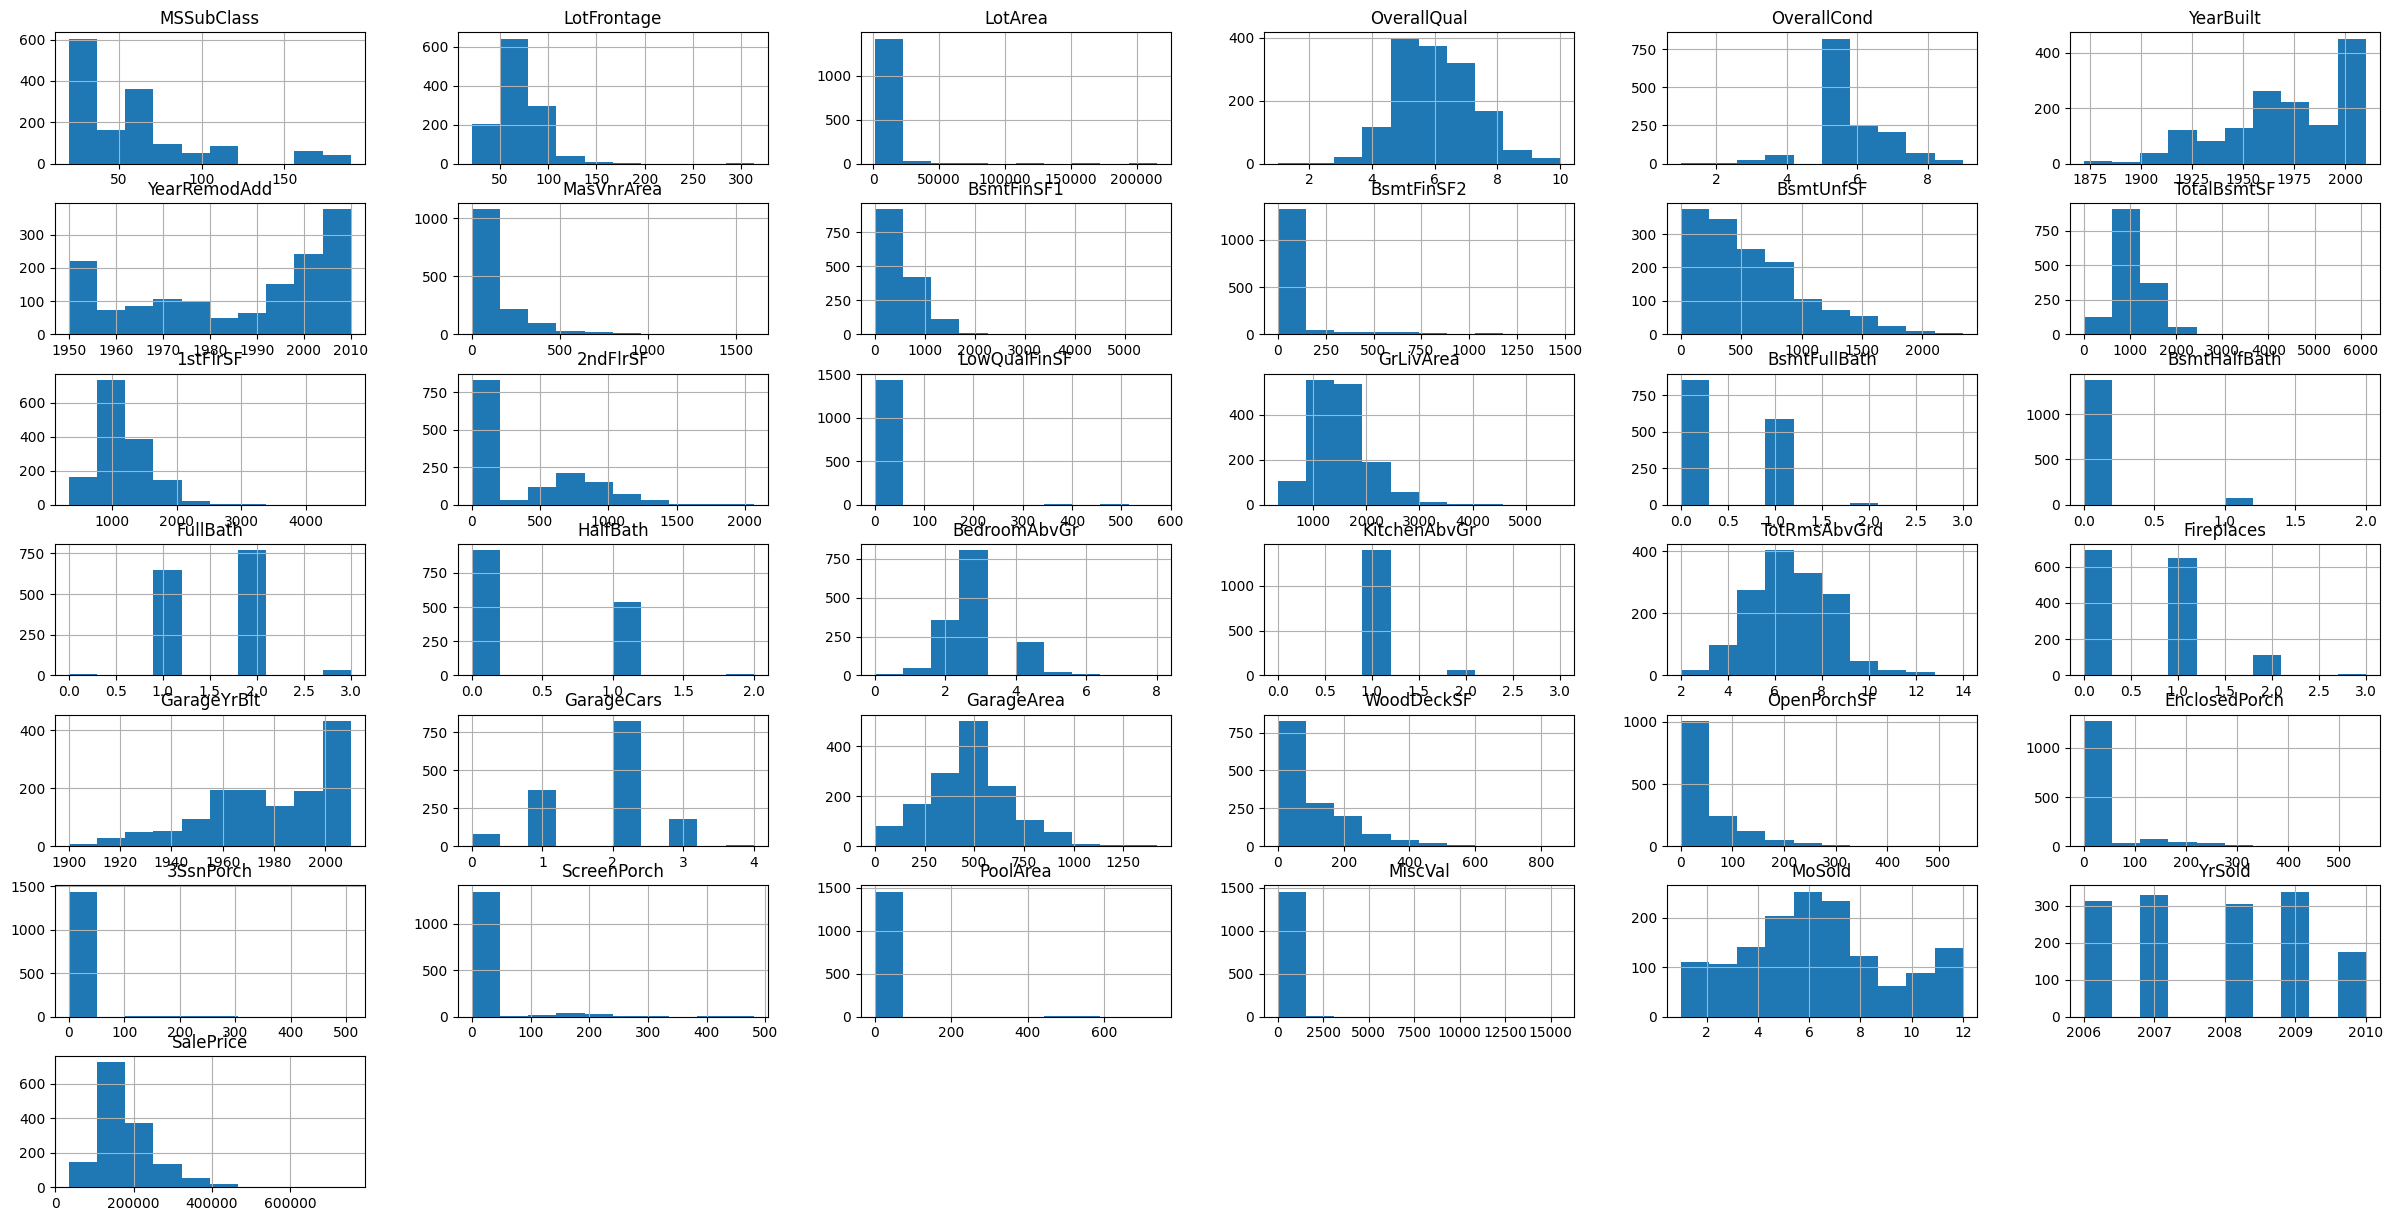

In [77]:
df1[numerical].hist(figsize=(30,15))

In [115]:
nu = pd.DataFrame(df1[numerical].isnull().sum())

In [239]:
nu_cat =pd.DataFrame(df1[categorical].isnull().sum())

array([[<AxesSubplot: title={'center': 'LotFrontage'}>,
        <AxesSubplot: title={'center': 'LotArea'}>,
        <AxesSubplot: title={'center': 'YearBuilt'}>,
        <AxesSubplot: title={'center': 'YearRemodAdd'}>,
        <AxesSubplot: title={'center': 'MasVnrArea'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF1'}>],
       [<AxesSubplot: title={'center': 'BsmtFinSF2'}>,
        <AxesSubplot: title={'center': 'BsmtUnfSF'}>,
        <AxesSubplot: title={'center': 'TotalBsmtSF'}>,
        <AxesSubplot: title={'center': '1stFlrSF'}>,
        <AxesSubplot: title={'center': '2ndFlrSF'}>,
        <AxesSubplot: title={'center': 'LowQualFinSF'}>],
       [<AxesSubplot: title={'center': 'GrLivArea'}>,
        <AxesSubplot: title={'center': 'BsmtFullBath'}>,
        <AxesSubplot: title={'center': 'BsmtHalfBath'}>,
        <AxesSubplot: title={'center': 'FullBath'}>,
        <AxesSubplot: title={'center': 'HalfBath'}>,
        <AxesSubplot: title={'center': 'BedroomAbvGr'}>],
       [<

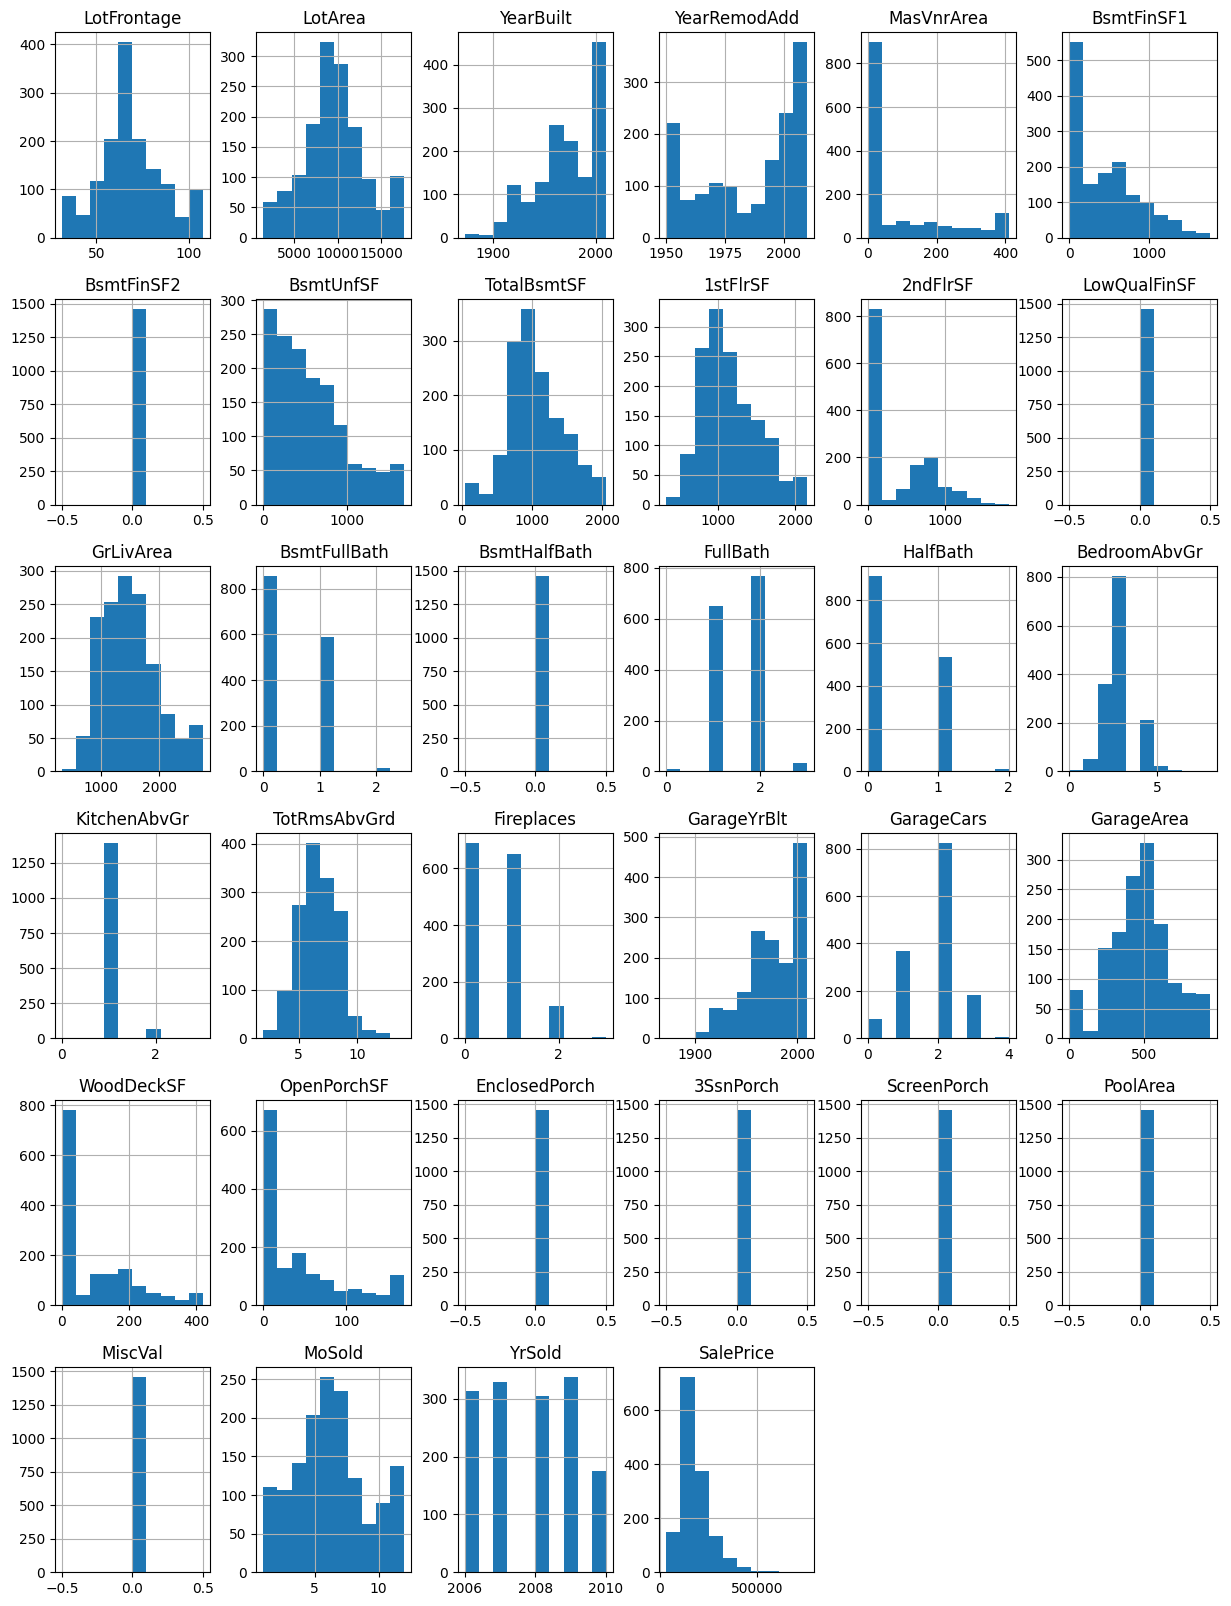

In [253]:
df1.hist(figsize=(15,20))

Lotfrontage -> median

In [84]:
df1.LotFrontage.fillna(df1.LotFrontage.median(), inplace=True)

categorical vars na

Alley, bsmtqual, bsmtcond, bsmtexp, fintyp1, fintype2, electrical, fireplacequ, garage - type, finish qual, cond, , poolqc, fence,misc_feature

In [83]:
df1.MasVnrType.value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [87]:
df1.MasVnrType.fillna(df1.MasVnrType.mode()[0], inplace=True)
df1.MasVnrArea.fillna(0, inplace=True)

garage

In [89]:
df1.GarageType.value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [97]:
df1.GarageType.fillna('None', inplace=True)
# df1.GarageArea.fillna(0, inplace=True)
df1.GarageYrBlt.fillna(df1.YearBuilt, inplace=True)
df1.GarageType.fillna('None', inplace=True)
df1.GarageFinish.fillna('None', inplace=True)
df1.GarageQual.fillna('None', inplace=True)
df1.GarageCond.fillna('None', inplace=True)

BSMT

In [100]:
df1.TotalBsmtSF.value_counts()

0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64

37 nulls

In [101]:
df1.BsmtQual.fillna('None', inplace=True)

df1.BsmtCond.fillna('None', inplace=True)

df1.BsmtExposure.fillna('None', inplace=True)

df1.BsmtFinType1.fillna('None', inplace=True)

df1.BsmtFinType2.fillna('None', inplace=True)


Fireplace

In [104]:
df1.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [105]:
df1.FireplaceQu.value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

690 nulls

In [106]:
df1.FireplaceQu.fillna('None', inplace=True)

In [110]:
df1.MiscFeature.fillna('None', inplace=True)
df1.Fence.fillna('None', inplace=True)
df1.PoolQC.fillna('None', inplace=True)

In [111]:
df1.shape

(1460, 80)

In [112]:
df1.Electrical.value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [113]:
df1.Electrical.fillna(df1.Electrical.mode()[0], inplace=True)

In [114]:
df1.Electrical.value_counts(dropna=False)

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Alley

In [117]:
df1.Alley.fillna('None',inplace=True)

In [119]:
df1.isnull().values.any()

False

Done with null handling!

In [120]:
df1.shape

(1460, 80)

In [127]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [128]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

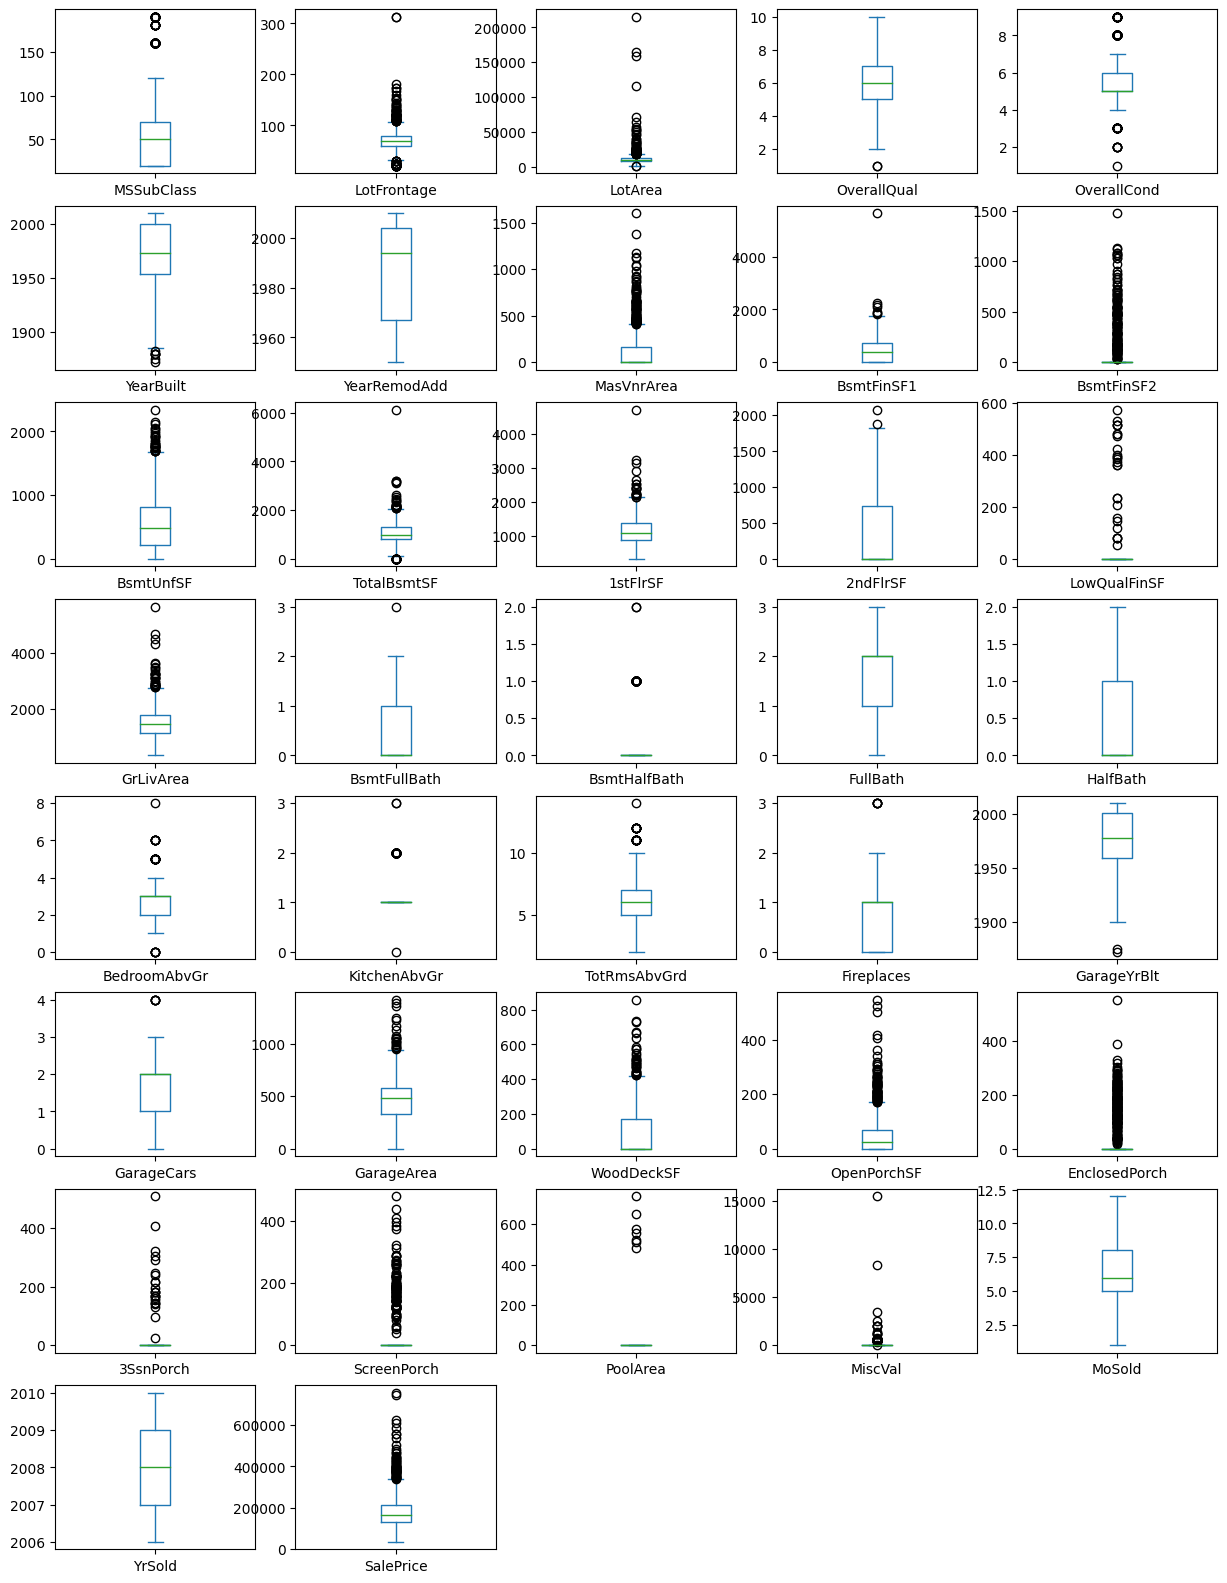

In [126]:
df1[numerical].plot(kind = "box",subplots = True,layout = (8,5),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [129]:
rem_list = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'
                        ,'1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','GarageArea'
                        ,'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [130]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

In [131]:
df2 = treat_outliers_all(df1 , rem_list)

In [132]:
df2.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,56.897260,69.090411,9647.388014,6.099315,5.575342,1971.267808,1984.865753,89.406336,439.997517,0.0,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,42.300571,17.231909,3594.356399,1.382997,1.112799,30.202904,20.645407,134.017553,433.219435,0.0,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,20.000000,31.500000,1481.500000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.0,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.0,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,190.000000,107.500000,17673.500000,10.000000,9.000000,2010.000000,2010.000000,410.625000,1780.625000,0.0,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


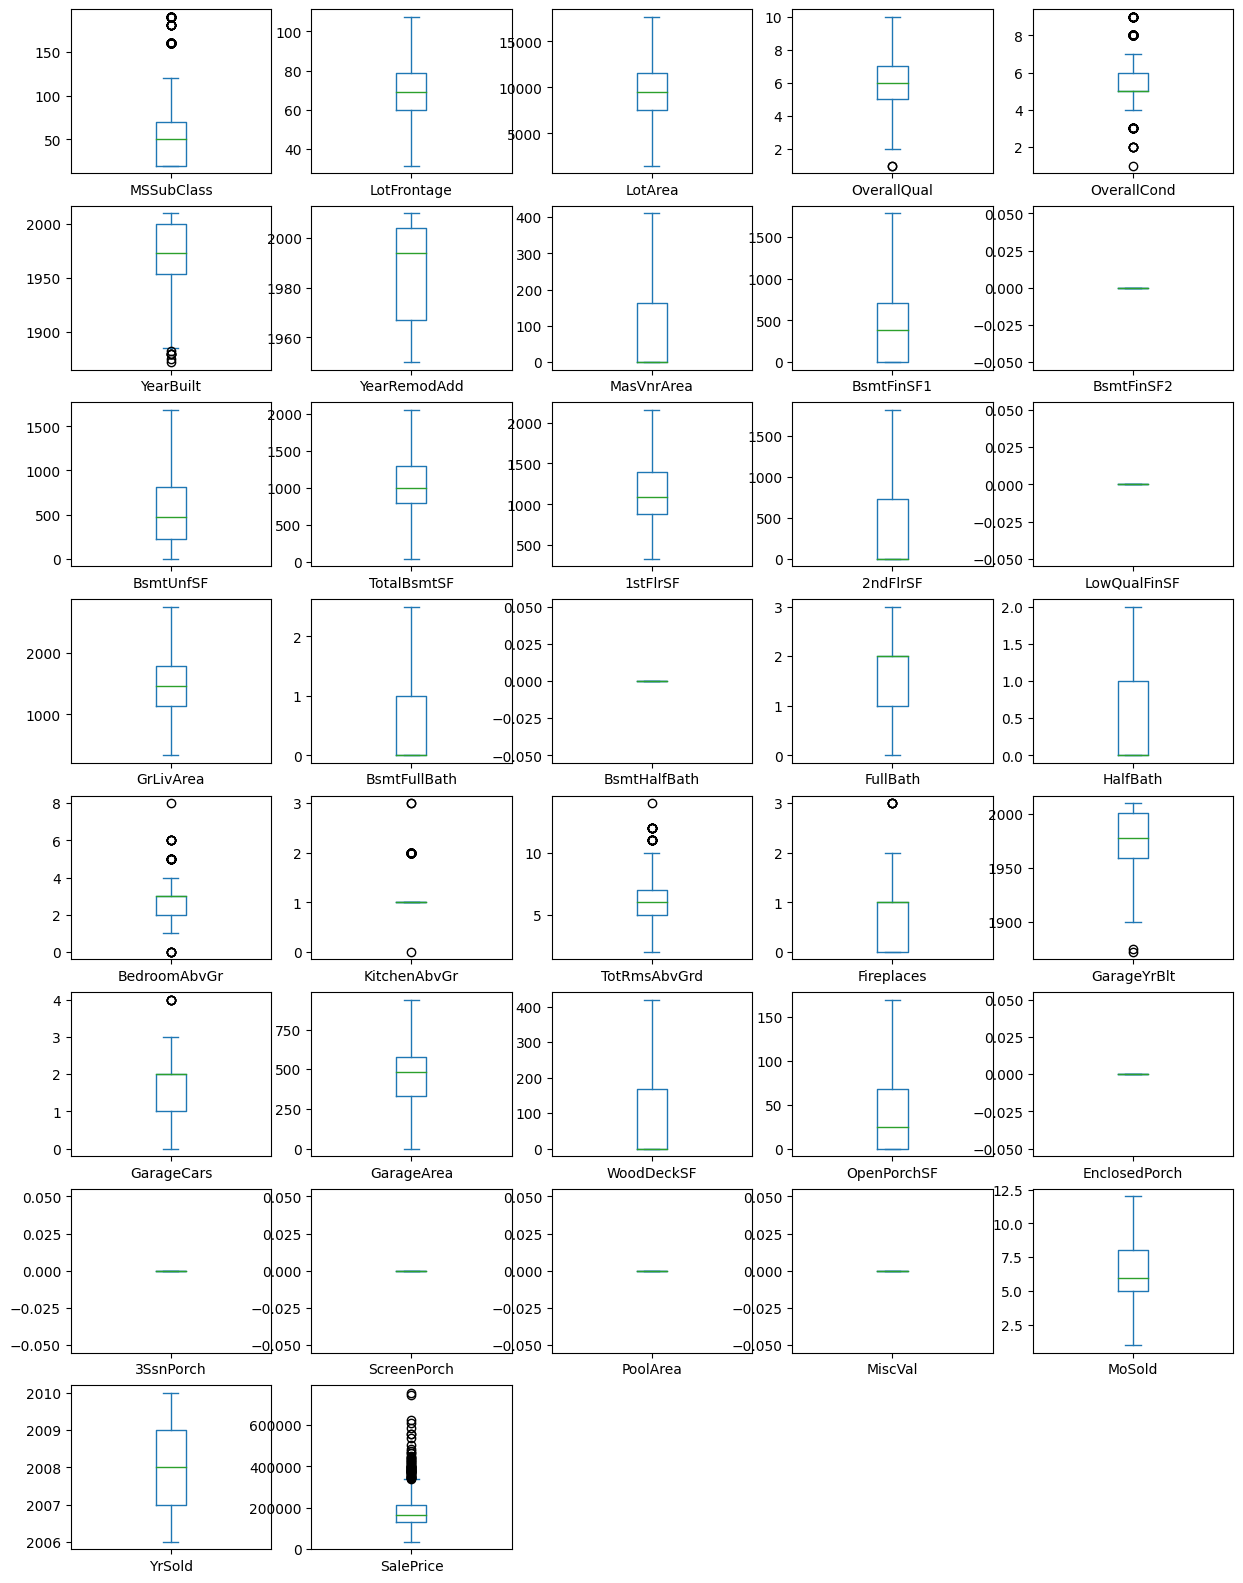

In [134]:
df2[numerical].plot(kind = "box",subplots = True,layout = (8,5),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [140]:
df3 = pd.get_dummies(data = df2, columns=df2[categorical].columns,drop_first=True)

In [142]:
df3.isnull().values.any()

False

In [146]:
df3.OverallQual=df3.OverallQual.astype('category')
df3.OverallCond=df3.OverallCond.astype('category')
df3.MSSubClass=df3.MSSubClass.astype('category')

In [264]:
df2.shape, df3.shape

((1460, 80), (1460, 260))

Generating one without Outlier Removals!

In [170]:
df4 = pd.get_dummies(data = df1, columns=df1[categorical].columns,drop_first=True)

In [263]:
df4.shape

(1460, 260)

In [171]:
df4.isnull().values.any()

False

In [172]:
df4.OverallQual=df4.OverallQual.astype('category')
df4.OverallCond=df4.OverallCond.astype('category')
df4.MSSubClass=df4.MSSubClass.astype('category')

Feature Engineering

In [188]:
X = df3.drop(['SalePrice'],axis=1)
y = df3.SalePrice

X.shape, y.shape

((1460, 259), (1460,))

In [189]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 259), (292, 259), (1168,), (292,))

In [190]:
from sklearn.linear_model import LinearRegression

# initialize the linear regression model
reg = LinearRegression()

# Train the model with our training data
reg.fit(X_train, y_train)

LinearRegression()

In [191]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [192]:
y_pred_lin = reg.predict(X_test)

In [193]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_ln = mean_absolute_error(y_test,y_pred_lin)
rmse_ln = sqrt(mean_squared_error(y_test,y_pred_lin))
r_sq_ln = r2_score(y_test,y_pred_lin)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_ln,3),round(rmse_ln,3),round(r_sq_ln,3)))

Mean Absolute Error: 19888.406
Root Mean Square Error: 37921.067
R2 Score: 0.813


Random Forests

In [194]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [195]:
X_train_RF.shape, X_test_RF.shape

((1168, 259), (292, 259))

In [196]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_RF,y_train)

RandomForestRegressor(n_estimators=10)

In [197]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [198]:
y_pred_RF = rf.predict(X_test_RF)

In [199]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf = mean_absolute_error(y_test,y_pred_RF)
rmse_rf = sqrt(mean_squared_error(y_test,y_pred_RF))
r_sq_rf = r2_score(y_test,y_pred_RF)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rf,3),round(rmse_rf,3),round(r_sq_rf,3)))

Mean Absolute Error: 18757.599
Root Mean Square Error: 30699.424
R2 Score: 0.877


With 100 trees

In [200]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_RF,y_train)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [201]:
y_pred_RF_100 = rf.predict(X_test_RF)
# print(y_pred_RF_100)

In [203]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf100 = mean_absolute_error(y_test,y_pred_RF_100)
rmse_rf100 = sqrt(mean_squared_error(y_test,y_pred_RF_100))
r_sq_rf100 = r2_score(y_test,y_pred_RF_100)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rf100,3),round(rmse_rf100,3),round(r_sq_rf100,3)))

Mean Absolute Error: 17859.709
Root Mean Square Error: 29343.582
R2 Score: 0.888


In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestRegressor(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [205]:
y_pred_RF_cv = clf.predict(X_test_RF)
# print(y_pred_RF_100)

In [206]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rfcv = mean_absolute_error(y_test,y_pred_RF_cv)
rmse_rfcv = sqrt(mean_squared_error(y_test,y_pred_RF_cv))
r_sq_rfcv = r2_score(y_test,y_pred_RF_cv)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rfcv,3),round(rmse_rfcv,3),round(r_sq_rfcv,3)))

Mean Absolute Error: 17333.661
Root Mean Square Error: 28480.173
R2 Score: 0.894


In [207]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [214]:
rent_model = Sequential()
rent_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
rent_model.add(Dense(512, activation = "relu"))
rent_model.add(Dense(1024, activation = "relu"))
rent_model.add(Dropout(0.2))
rent_model.add(Dense(1024, activation = "relu"))
rent_model.add(Dense(512, activation = "relu"))
rent_model.add(Dense(256, activation = "relu"))
rent_model.add(Flatten())
rent_model.add(Dense(512, activation = "relu"))
rent_model.add(Dropout(0.5))
rent_model.add(Dense(512, activation = "relu"))
rent_model.add(Dropout(0.5))
rent_model.add(Dense(1, activation = "linear",kernel_regularizer = tf.keras.regularizers.l1(l=0.001)))
rent_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               66560     
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dense_11 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 256)              

In [215]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the network :
rent_model.compile(optimizer=optimizer, loss=tf.keras.losses.MAE, metrics=[tf.keras.metrics.MAE])

In [216]:
m_loss = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [217]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='rent_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [218]:
history=rent_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=64, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


 5/15 [=========>....................] - ETA: 0s - loss: 175529.2500 - mean_absolute_error: 175529.2188
Epoch 1: val_loss improved from inf to 89331.75781, saving model to rent_model.h5
15/15 [==============================] - 1s 34ms/step - loss: 175183.8594 - mean_absolute_error: 175183.8438 - val_loss: 89331.7578 - val_mean_absolute_error: 89331.7266
Epoch 2/100
 1/15 [=>............................] - ETA: 0s - loss: 92222.3828 - mean_absolute_error: 92222.3516
Epoch 2: val_loss improved from 89331.75781 to 57383.94531, saving model to rent_model.h5
15/15 [==============================] - 0s 10ms/step - loss: 73211.0469 - mean_absolute_error: 73211.0234 - val_loss: 57383.9453 - val_mean_absolute_error: 57383.9219
Epoch 3/100
 1/15 [=>............................] - ETA: 0s - loss: 73402.4609 - mean_absolute_error: 73402.4297
Epoch 3: val_loss improved from 57383.94531 to 29724.11328, saving model to rent_model.h5
15/15 [==============================] - 0s 10ms/step - loss: 42341.

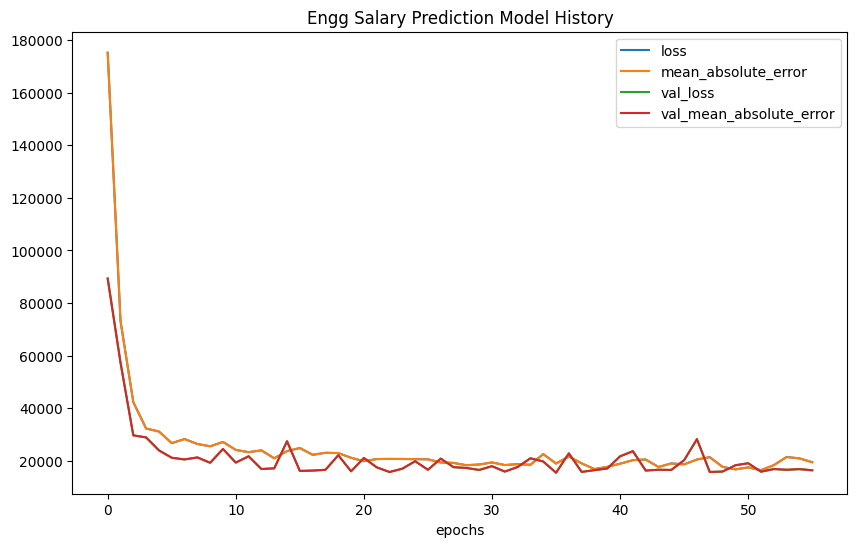

In [219]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('Engg Salary Prediction Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [220]:
y_pred_cnn = rent_model.predict(X_test_RF)
# print(y_pred_cnn)

10/10 [==============================] - 0s 3ms/step


In [221]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_cnn = mean_absolute_error(y_test,y_pred_cnn)
rmse_cnn = sqrt(mean_squared_error(y_test,y_pred_cnn))
r_sq_cnn = r2_score(y_test,y_pred_cnn)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_cnn,3),round(rmse_cnn,3),round(r_sq_cnn,3)))

Mean Absolute Error: 17167.192
Root Mean Square Error: 28661.551
R2 Score: 0.893


In [222]:
linear_reg_results =  pd.Series({ "MAE": mae_ln, "RMSE": rmse_ln, "R-Square": r_sq_ln }, name="Linear Regression")
rf_10_results = pd.Series({ "MAE": mae_rf, "RMSE": rmse_rf, "R-Square": r_sq_rf }, name="Random Forest-10")
rf_100_results = pd.Series({ "MAE": mae_rf100, "RMSE": rmse_rf100, "R-Square": r_sq_rf100 }, name="Random Forest-100")
rf_cv_results =  pd.Series({ "MAE": mae_rfcv, "RMSE": rmse_rfcv, "R-Square": r_sq_rfcv }, name="Random Forest-CV")
cnn_results = pd.Series({ "MAE": mae_cnn, "RMSE": rmse_cnn, "R-Square": r_sq_cnn }, name="CNN")


results = pd.DataFrame([linear_reg_results, rf_10_results, rf_100_results, rf_cv_results, cnn_results])
results.round(3)

,MAE,RMSE,R-Square
Linear Regression,19888.406,37921.067,0.813
Random Forest-10,18757.599,30699.424,0.877
Random Forest-100,17859.709,29343.582,0.888
Random Forest-CV,17333.661,28480.173,0.894
CNN,17167.192,28661.551,0.893


Test dataset!

In [223]:
test_df = pd.read_csv('test.csv')
test_df.shape

(1459, 80)

In [227]:
test_df = test_df.drop('Id',axis=1)
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [228]:
categorical = [var for var in test_df.columns if test_df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 43 categorical variables

The categorical variables : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [229]:
numerical = [var for var in test_df.columns if test_df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 36 numerical variables

The numerical variables : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [230]:
test_df.LotFrontage.fillna(df1.LotFrontage.median(), inplace=True)

In [231]:
test_df.MasVnrType.fillna(df1.MasVnrType.mode()[0], inplace=True)
test_df.MasVnrArea.fillna(0, inplace=True)

In [232]:
test_df.GarageType.fillna('None', inplace=True)
# test_df.GarageArea.fillna(0, inplace=True)
test_df.GarageYrBlt.fillna(test_df.YearBuilt, inplace=True)
test_df.GarageType.fillna('None', inplace=True)
test_df.GarageFinish.fillna('None', inplace=True)
test_df.GarageQual.fillna('None', inplace=True)
test_df.GarageCond.fillna('None', inplace=True)

In [233]:
test_df.BsmtQual.fillna('None', inplace=True)

test_df.BsmtCond.fillna('None', inplace=True)

test_df.BsmtExposure.fillna('None', inplace=True)

test_df.BsmtFinType1.fillna('None', inplace=True)

test_df.BsmtFinType2.fillna('None', inplace=True)

In [234]:
test_df.FireplaceQu.fillna('None', inplace=True)

In [235]:
test_df.MiscFeature.fillna('None', inplace=True)
test_df.Fence.fillna('None', inplace=True)
test_df.PoolQC.fillna('None', inplace=True)

In [236]:
test_df.Electrical.fillna(df1.Electrical.mode()[0], inplace=True)

In [237]:
test_df.Alley.fillna('None',inplace=True)

In [245]:
nu_test = pd.DataFrame(test_df[numerical].isnull().sum())

In [246]:
nu_cat_test =pd.DataFrame(test_df[categorical].isnull().sum())

In [254]:
test_df.BsmtFinSF1.fillna(df1.BsmtFinSF1.median(), inplace=True)
test_df.BsmtFinSF2.fillna(df1.BsmtFinSF2.median(), inplace=True)

test_df.BsmtUnfSF.fillna(df1.BsmtUnfSF.median(), inplace=True)

test_df.TotalBsmtSF.fillna(df1.TotalBsmtSF.median(), inplace=True)
test_df.FullBath.fillna(df1.FullBath.median(), inplace=True)
test_df.HalfBath.fillna(df1.HalfBath.median(), inplace=True)
test_df.BsmtFullBath.fillna(df1.BsmtFullBath.mode()[0], inplace=True)
test_df.BsmtHalfBath.fillna(df1.BsmtHalfBath.mode()[0], inplace=True)
test_df.GarageCars.fillna(df1.GarageCars.mode()[0], inplace=True)
test_df.GarageArea.fillna(df1.GarageArea.median(), inplace=True)

In [255]:
test_df.MSZoning.fillna(df1.MSZoning.mode()[0], inplace=True)
test_df.Utilities.fillna(df1.Utilities.mode()[0], inplace=True)
test_df.Exterior1st.fillna(df1.Exterior1st.mode()[0], inplace=True)
test_df.Exterior2nd.fillna(df1.Exterior2nd.mode()[0], inplace=True)
test_df.KitchenQual.fillna(df1.KitchenQual.mode()[0], inplace=True)
test_df.Functional.fillna(df1.Functional.mode()[0], inplace=True)
test_df.SaleType.fillna(df1.SaleType.mode()[0], inplace=True)

In [256]:
test_df.isnull().values.any()

False

In [257]:
test_df.shape

(1459, 79)

In [258]:
test_df_2 = treat_outliers_all(test_df,rem_list)

In [262]:
test_df_2.shape

(1459, 79)

In [265]:
test_df_3 = pd.get_dummies(data = test_df_2, columns=df1[categorical].columns,drop_first=True)

In [266]:
test_df_3.OverallQual=test_df_3.OverallQual.astype('category')
test_df_3.OverallCond=test_df_3.OverallCond.astype('category')
test_df_3.MSSubClass=test_df_3.MSSubClass.astype('category')

In [267]:
test_df_3.shape

(1459, 241)

In [269]:
# Get missing columns in the training test
missing_cols = set( X_test.columns ) - set( test_df_3.columns )
# Add a missing column in test_df_3 set with default value equal to 0
for c in missing_cols:
    test_df_3[c] = 0
# Ensure the order of column in the test_df_3 set is in the same order than in train set
test_df_3 = test_df_3[X_test.columns]

In [270]:
test_df_3.shape

(1459, 259)

In [271]:
y_pred = clf.predict(test_df_3)

In [272]:
pd.DataFrame(y_pred).to_csv('pred_rfcv.csv')